<a href="https://colab.research.google.com/github/vinaylanjewar/Netflix-Movies-TV-Shows-Clustering/blob/main/Capstone_project_4__NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load data
netflix_df=pd.read_csv("/content/drive/MyDrive/Capstone Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Making two copies of the dataset

# df1 is used in preprocessing of clustring
df1=netflix_df.copy()

# df2 is used to check the predicted output
df2=netflix_df.copy()

In [5]:
# First look of the dataset
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [6]:
# Checking the shape of the dataframe
netflix_df.shape

(7787, 12)

In [7]:
# Columns name
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Information about the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# Find the various statistic for all the columns
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


**The dataset has 7787 rows and 12 columns:**

show_id: unique id of each show (not much of a use for us in this notebook)

type: The category of a show, can be either a Movie or a TV Show

title: Name of the show

director: Name of the director(s) of the show

cast: Name of actors and other cast of the show

country: Name of countries the show is available to watch on Netflix

date_added: Date when the show was added on Netflix

release_year: Release year of the show

rating: Show rating on netflix

duration: Time duration of the show

listed_in: Genre of the show

description: Some text describing the show

# **Data Wrangling**

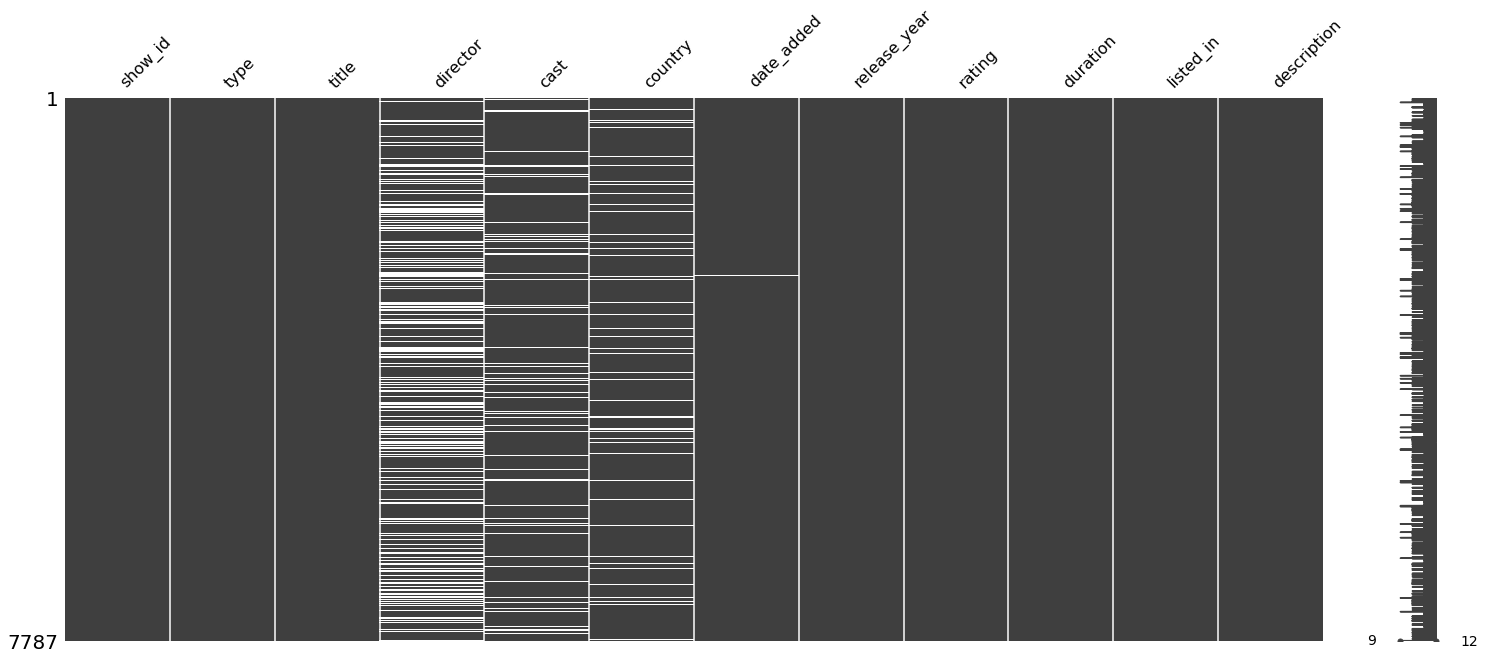

In [10]:
# Visualize missing values as a matrix
msno.matrix(netflix_df)

Using this matrix you can very quickly find the pattern of missingness in the dataset. From the above visualisation we can observe that "director" has a peculiar pattern that stands out."cast" and "country" have a similar pattern of missing values while column "date_added" shows a different pattern.

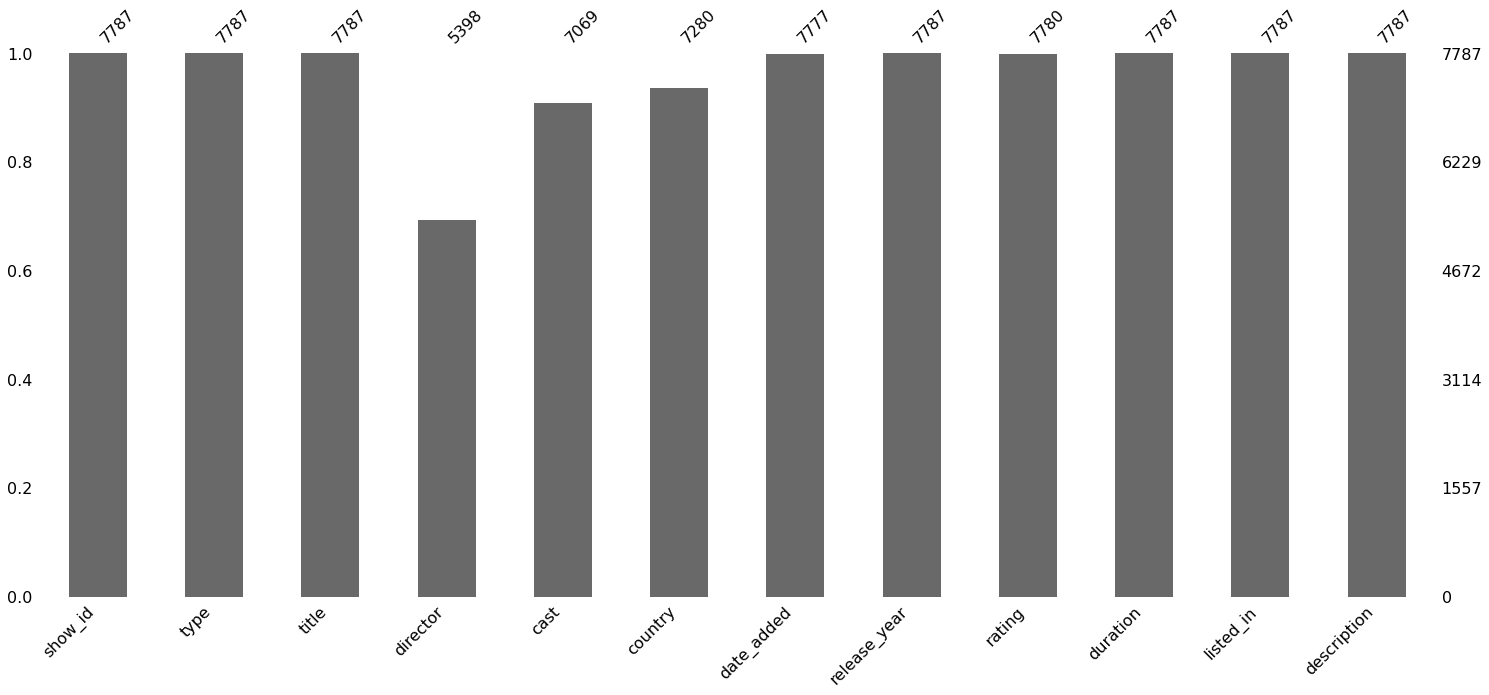

In [11]:
msno.bar(netflix_df);

This bar chart gives you an idea about how many missing values are there in each column. "director" has the most missing value followed by "cast" and "country". There are few missing value in "date_added" and "rating".

Finding the null values.

In [12]:
#Summing the values to get the null values
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
# Here we check the duplicate observtions in our dataset
duplicate = netflix_df[netflix_df.duplicated()]

In [14]:
# Printing the duplicate observations
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Duplicate Rows :


show_id	 type 	title 	director	cast	country 	date_added 	release_year	rating	duration	listed_in 	**description**

### **Observation:**
Our dataset does not contain any duplicate observations.

In [15]:
# Checking the NAN/Null values in our dataset
for i in netflix_df.columns:
    null_rate = netflix_df[i].isna().sum() / len(netflix_df) * 100 
    if null_rate > 0 :
        print("{} null values percentage: {}%".format(i,round(null_rate,2))," \n null value counts:",netflix_df[i].isna().sum())

director null values percentage: 30.68%  
 null value counts: 2389
cast null values percentage: 9.22%  
 null value counts: 718
country null values percentage: 6.51%  
 null value counts: 507
date_added null values percentage: 0.13%  
 null value counts: 10
rating null values percentage: 0.09%  
 null value counts: 7


### **Observations:** 


*   The director column has 30% null values, which is a significantly large proportion. In our analysis, these null values cause certain problems.


This is always circumstance dependent, however in this case: 

* We will need to replace blank countries with the mode (most common) country.

* It would be better to keep director because it can be fascinating to look at a specific filmmaker's movie. As a result, we substitute the null values with the word 'unknown' for further analysis.

* It would be better to keep the cast because it can be fascinating to look at the films of a specific cast. As a result, we substitute the null values with the word 'unknown' for further analysis.

In [16]:
# Replacing the null values in director column
netflix_df['director'].replace(np.nan, "unknown",inplace  = True)

In [17]:
# Checking the null values are replaced or not
netflix_df['director'].isnull().sum()

0

In [18]:
# Replacing the null values in cast column
netflix_df['cast'].replace(np.nan, "unknown",inplace  = True)


In [19]:
# Checking the null values are replaced or not
netflix_df['cast'].isnull().sum()

0

In [20]:
# Replacing the null values in country column
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Checking the null values are replaced or not
netflix_df['country'].isnull().sum()

0

In [21]:
# Replacing the null values in country column
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

# Checking the null values are replaced or not
netflix_df['rating'].isnull().sum()

0

**There are very few null entries in the date_added fields and there is no logical way to handling the dates, thus deleting them is a better alternative..**

In [22]:
# Dropping the null values of the date_added column
netflix_df.dropna(inplace=True)

In [23]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## **Let's genereate new columns for our analyis**

In [25]:
# Adding the Month-added and year_addedcolumn in our dataset
import datetime as dt
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

# Year_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

#Adding month column from 'date_added'
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['month_name_added']=netflix_df['date_added'].dt.month_name()

# Droping the month_added columns
netflix_df.drop(['date_added'],axis=1,inplace=True)

**Obtaining the first nation name simplifies the county-by-county analysis.**

In [26]:
# Lets retrieve just the first country
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

In [27]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['age_rating'] = netflix_df['rating'].replace(rating_ages)
netflix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

# **Exploratory Data Analysis(EDA)**

##**Analyze the type of content available on Netflix**

No handles with labels found to put in legend.


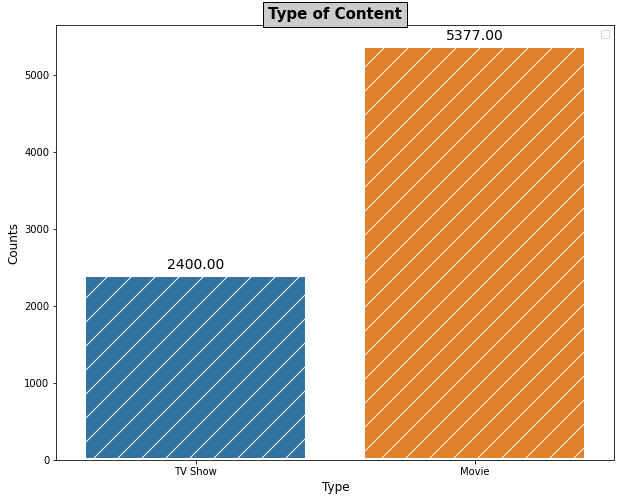

In [28]:
# Plotting the countplot
plt.figure(figsize=(10,8))
ax=sns.countplot('type',data=netflix_df,lw=4, ec='white',
                  hatch='/')
plt.title('Type of Content', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend()
# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=14)

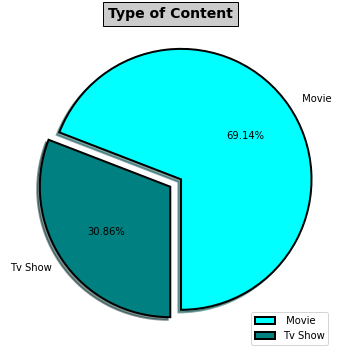

In [29]:
# Parameters for the graph
plt.figure(figsize=(8,6))
wedgeprops = {"linewidth": 2, "edgecolor":"k"}
labels = [" Movie",'Tv Show']
values = netflix_df['type'].value_counts().values

# Plotting the graph
myexplode = [0.1, 0]
colors = ['aqua', 'teal']
plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=270,
       colors=colors, explode = myexplode, wedgeprops = wedgeprops)

plt.title('Type of Content', bbox={'facecolor':'0.8', 'pad':5},
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### **Observations:** 
* It is evident that there are more movies on Netflix than TV shows. 

* Netflix has 5377 movies, which is more than double the quantity of TV shows.

## **Movie ratings analysis**

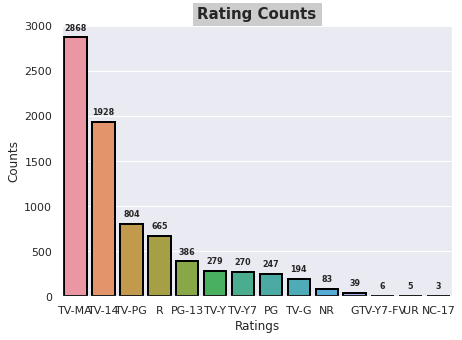

In [30]:
# Plotting the countplot for the ratings
plt.figure(figsize=(7,5))
sns.set(style="darkgrid")
ax=sns.countplot('rating',data=netflix_df,lw=2, ec='black',
                  order = netflix_df['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=8, fontweight='bold')

In [31]:
#Creating 2 new dataframes for movies and TV shows
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

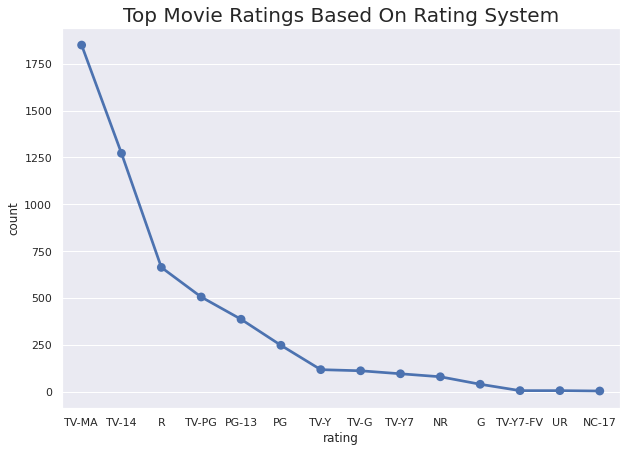

In [32]:
#Plotting the ratings on movies on pointplot
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

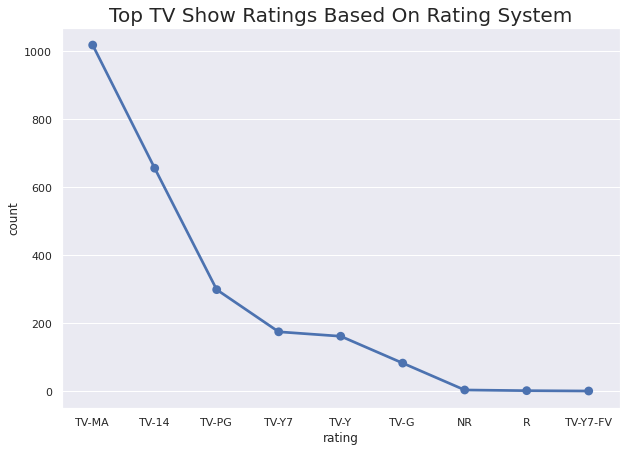

In [33]:
#Plotting the ratings on TV Shows on pointplot
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

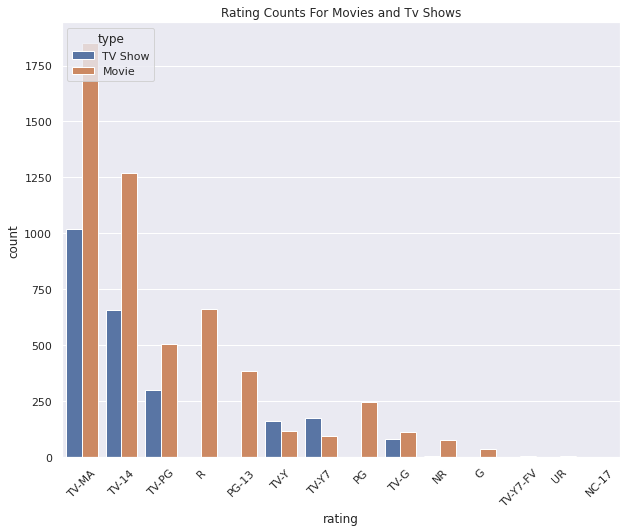

In [34]:
#Plotting the same on a comparison plot
sns.set()
plt.figure(figsize=(10,8))
ax=sns.countplot(x="rating",data= netflix_df,hue= "type",order = netflix_df['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("Rating Counts For Movies and Tv Shows")
plt.show()




**Observations:**


*   The 'TV-MA' rating is used in the majority of the film. The TV Parental Guidelines provide a "TV-MA" classification to a television programme that is intended solely for mature audiences.

*   The second largest is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.


*   The third most common is the extremely popular 'R' rating. The Motion Picture Association of America defines an R-rated film as one that contains material that may be inappropriate for children under the age of 17; the MPAA states that "Under 17 requires accompanying parent or adult guardian."


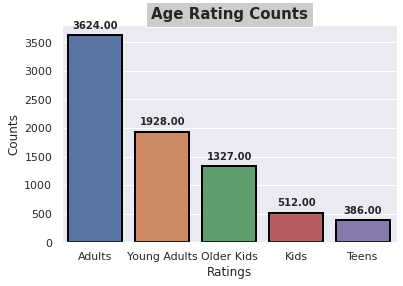

In [35]:
# Countplot for Adult, Teen, Kids, Older Kids
ax=sns.countplot('age_rating',data=netflix_df,lw=2, ec='black',
                  order = netflix_df['age_rating'].value_counts().index)
plt.title('Age Rating Counts', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points',fontsize=10, fontweight='bold')

### **Observations:**
*  We can observe from the above count plot that the majority of Netflix material is intended for adults. There is very little content available for teens and kids.

# **Content Growth**

## **Growth in content over the years**

Text(0.5, 0, 'Added Year')

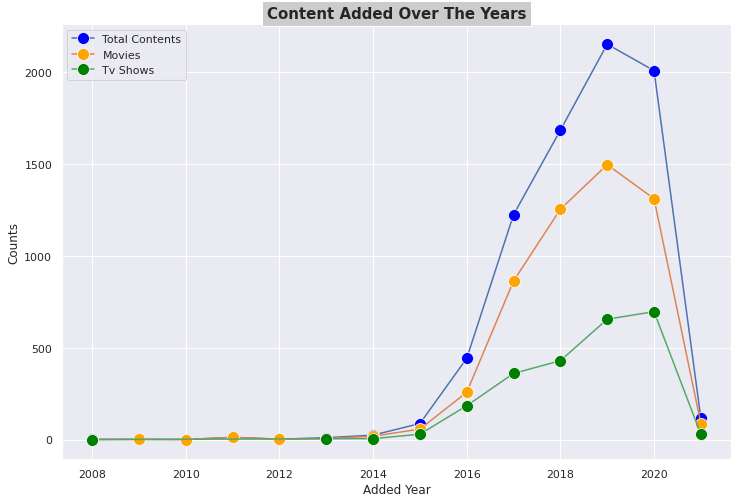

In [36]:
# Plotting the graph for the growth of contents over the netflix
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

tv = df_tv[col].value_counts().reset_index().sort_values('index')
tv = tv.rename(columns = {col : "count", "index" : col})
tv = tv.sort_values(col)

movies = df_movies[col].value_counts().reset_index().sort_values("index")
movies = movies.rename(columns = {col : "count", "index" : col})
movies = movies.sort_values(col)

total = netflix_df[col].value_counts().reset_index().sort_values("index")
total = total.rename(columns = {col : "count", "index" : col})
total = total.sort_values(col)



trace3 = sns.lineplot(x=total[col], y=total["count"], data=netflix_df,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'blue', markersize = 12)
trace2 = sns.lineplot(x=movies[col], y=movies["count"], data=df_movies,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
trace1 = sns.lineplot(x=tv[col], y=tv["count"], data=df_tv,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'green', markersize = 12)
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.title("Content Added Over The Years",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Added Year')

## **Month wise Analysis of content**

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


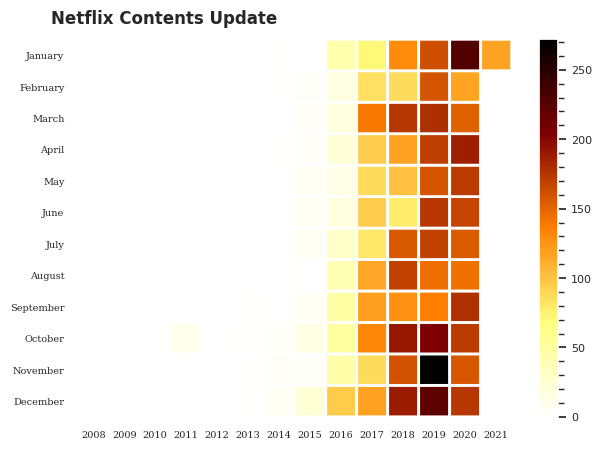

In [37]:
#Monitoring the content over the years on monthly basis with the help of heatmap

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_df.groupby('year_added')['month_name_added'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(7, 5), dpi=100)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

Text(0.5, 1.0, 'Cumulative')

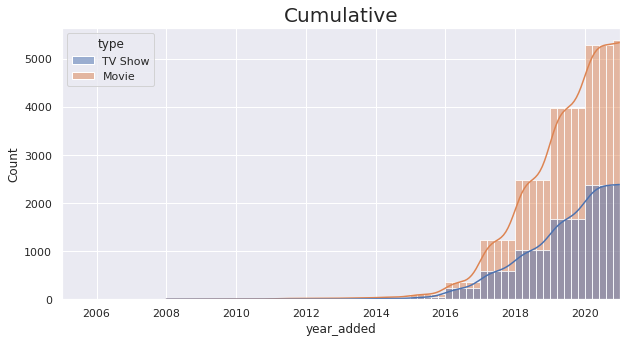

In [38]:
# Cumulative
plt.figure(figsize= (10,5))
ax=sns.histplot(x= netflix_df.year_added, hue= netflix_df.type, kde= True, cumulative= True)
plt.xlim(2005,2021)
plt.title("Cumulative", fontsize= 20)

If the latest year 2019 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

Text(0.5, 0, 'Added Month Name')

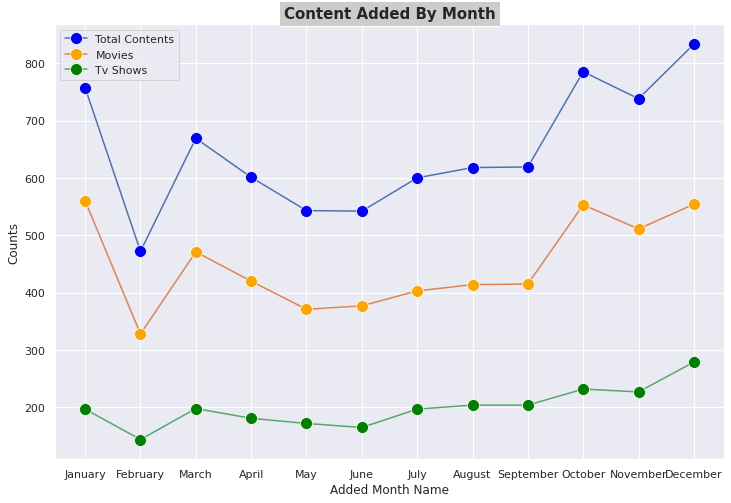

In [39]:
# Plotting the graph for the content added by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

col = "month_name_added"

dfm1 = df_tv[col].value_counts().reset_index()
dfm1= dfm1.rename(columns = {col : "count", "index" : col})
dfm1['month_name_added'] = pd.Categorical(dfm1['month_name_added'],month_order)
dfm1.sort_values('month_name_added').reset_index(drop='index')

dfm2 = df_movies[col].value_counts().reset_index()
dfm2 = dfm2.rename(columns = {col : "count", "index" : col})
dfm2['month_name_added'] = pd.Categorical(dfm2['month_name_added'],month_order)
dfm2.sort_values('month_name_added').reset_index(drop='index')


dfm3 = netflix_df[col].value_counts().reset_index().sort_values("index")
dfm3 = dfm3.rename(columns = {col : "count", "index" : col})
dfm3['month_name_added'] = pd.Categorical(dfm3['month_name_added'],month_order)
dfm3.sort_values('month_name_added').reset_index(drop='index')



trace3 = sns.lineplot(x=dfm3[col], y=dfm3["count"], data=netflix_df,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'blue', markersize = 12)
trace2 = sns.lineplot(x=dfm2[col], y=dfm2["count"], data=df_movies,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'orange', markersize = 12)
trace1 = sns.lineplot(x=dfm1[col], y=dfm1["count"], data=df_tv,linestyle = 
                      'solid', marker = 'o',
         markerfacecolor = 'green', markersize = 12)
label=['Total Contents','Movies','Tv Shows']
plt.legend(label)
plt.title("Content Added By Month",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Added Month Name')

### **Observations:**

* The number of movies on Netflix is growing significantly faster than the number of TV shows.

* In both 2018 and 2019, approximately 1200 new movies were added.

* We saw a huge increase in the number of movies and television episodes after 2014.

* Because of covid-19, there is a significant drop in the number of movies and television episodes produced after 2019.

* It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.

* The above graph shows that the most content is added to Netflix in December.
* In February, Netflix adds extremely few new movies and television episodes.

# **Release Year Analysis**

Text(0.5, 0, 'Release Year')

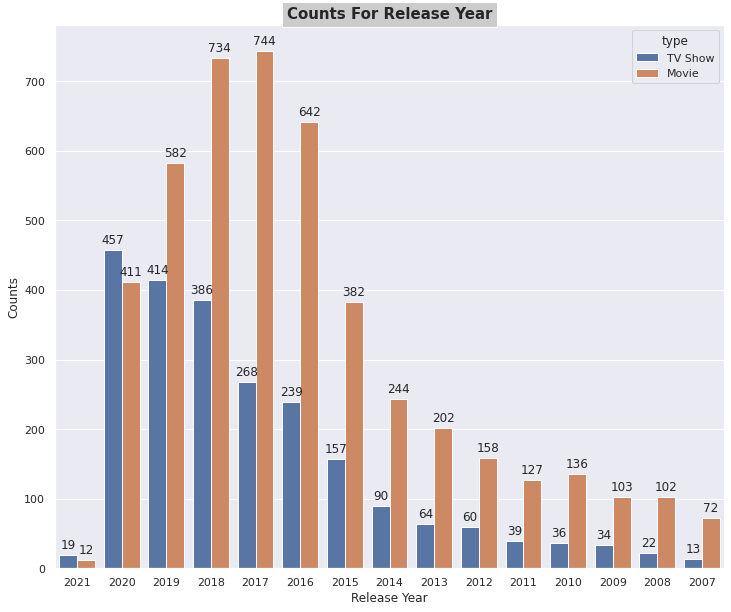

In [40]:
# Plotting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot('release_year',data=netflix_df,hue='type',
              order=[2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
                     ,2009,2008,2007])
# We take only those year under consideration, onwards which netflix starts streaming services.

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Counts For Release Year",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Release Year')

### **Observations:**

* According to the following countplot, 774 movies were released in 2017, which is the most number of releases in any year.

* According to the above countplot, there will be 457 television shows released in 2020, which is the most of any year.

# **Country Analysis**

Text(0, 0.5, 'Country Name')

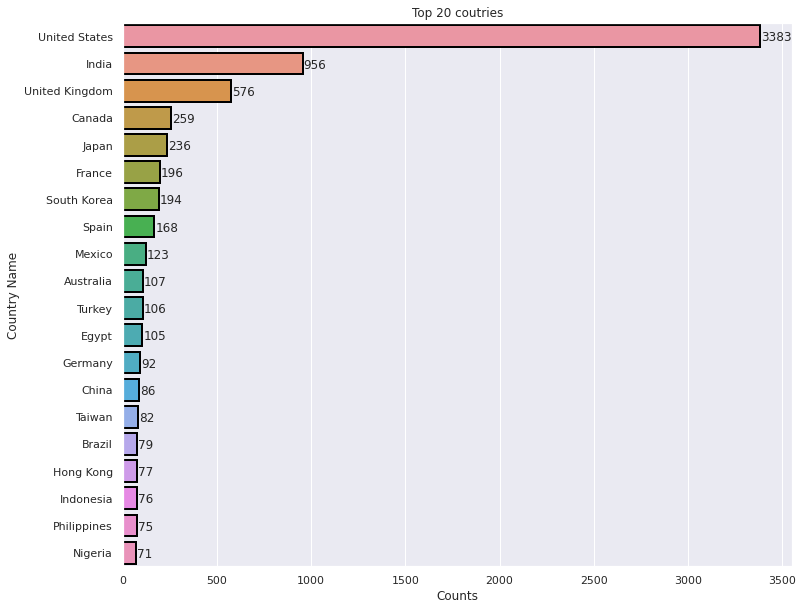

In [41]:
# Top 20 countries on Netflix
plt.figure(figsize=(12,10))
ax=sns.countplot(y='principal_country',lw=2, ec='black',data=netflix_df,
              order=netflix_df['principal_country'].value_counts().index[0:20])
# Adding Annotation
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center',fontsize=12)
plt.title('Top 20 coutries')
plt.xlabel('Counts')
plt.ylabel('Country Name')

Looking at the percentage of content released in top 8 nations.

In [42]:
#Listing the top 10 nations

top = netflix_df['country'].value_counts()[0:10]
top.index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Egypt', 'Turkey'],
      dtype='object')

### **Observations:**
* The United States is the most prolific generator of Netflix content, with India and the United Kingdom trailing far behind.


##**How does content differ by country in the top ten lists?**

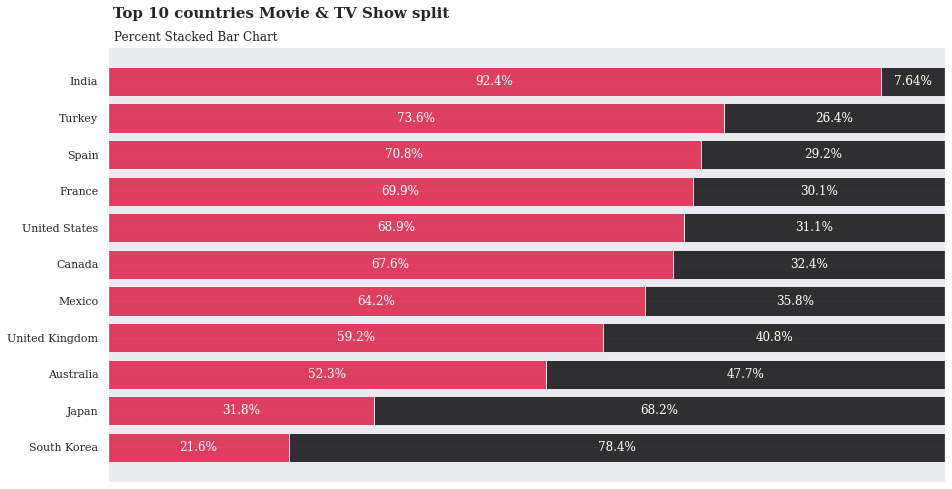

In [43]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = netflix_df['principal_country'].value_counts()[:11].index
content_data = netflix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(content_data_ratio.index, fontfamily='serif', fontsize=11)

# Addind Annotaion
for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['Movie'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')

for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['TV Show'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]+content_data_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, 
        fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

plt.show()

### **Observations:**

* The majority of the content on Netflix in India is comprised of movies.

* Bollywood is a significant business, and movies, rather than TV shows, may be the industry's major focus.

* South Korean Netflix on the other hand is almost entirely TV Shows.

* The fundamental reason for the variation in content must be due to market research undertaken by Netflix.

# **Distribution of Movie Duration**

90     136
93     131
91     125
94     125
95     119
92     118
97     117
96     115
98     106
103    101
88     101
99     101
102     98
100     97
106     97
101     96
86      93
105     91
104     89
89      88
Name: duration, dtype: int64

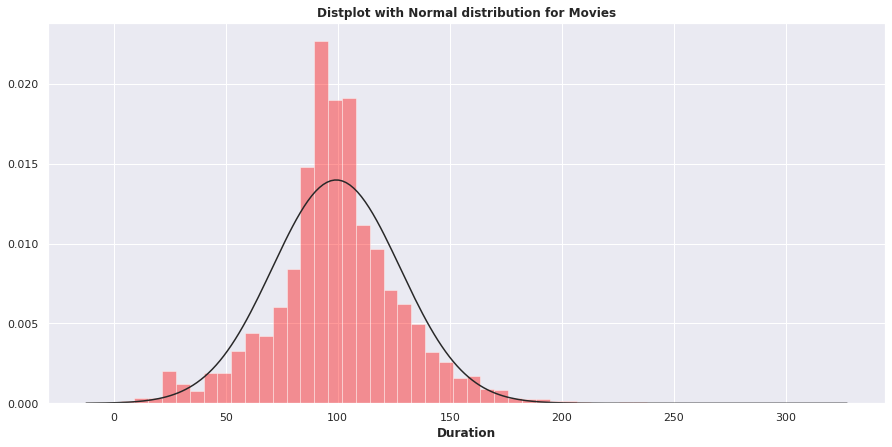

In [44]:
# Importing Norm Distrbution 
from scipy.stats import norm

# Plotting the distplot
time_df=df_movies['duration'].str.extract('(\d+)')
time_df=time_df.rename(columns={0:'duration'})
time_df
plt.figure(figsize=(15,7))
sns.distplot(time_df['duration'],fit=norm,kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.xlabel('Duration',fontweight="bold")
time_df['duration'].value_counts()[0:20]

### **Observations:**
* The majority of the films are between 85 and 120 minutes long, which is appropriate.

## **Movie's Duration Trends**

Text(0.5, 0, 'Year of release')

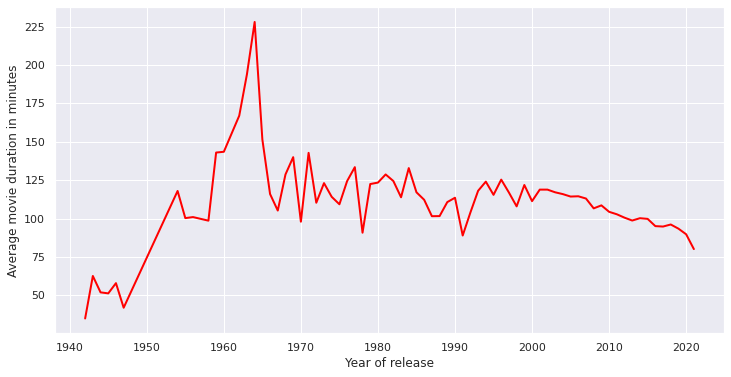

In [45]:
# Extacting the length of movie
df_movies['minute'] = df_movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = df_movies.groupby(['release_year'])['minute'].mean()
duration_df=pd.DataFrame(duration_year)

# Plotting the graph
plt.figure(figsize=(12,6))

sns.lineplot(x=duration_df.index, y=duration_df.minute,linewidth=2,
             linestyle = 'solid',color='red')
             

plt.ylabel('Average movie duration in minutes')
plt.xlabel('Year of release')

### **Observation:**

* Movies made before 1948 have a short average duration, compared to those released after 1948.

* The average movie's duration released during the 1960 era was the longest.

*  At the beginning of the twentieth century, the average length of a film was decreasing over time.

## **Average Movie Duration Vs Rating**

Text(0.5, 1.0, 'Average Movie Duration Vs Rating')

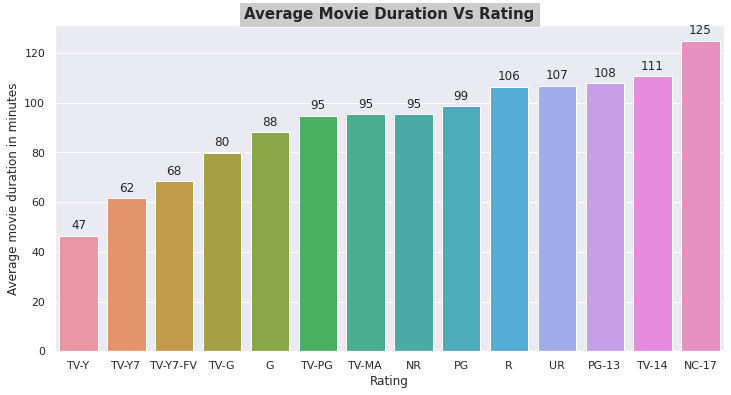

In [46]:
df_movies['minute'] = df_movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = df_movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(12,6))
ax=sns.barplot(x=duration_df.index, y=duration_df.minute)

plt.ylabel('Average movie duration in minutes')
plt.xlabel('Rating')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Average Movie Duration Vs Rating",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})

### **Observations:**

* Those movies that have a rating of NC-17 have the longest average duration.

* When it comes to movies having a TV-Y rating, they have the shortest runtime on average.

Text(0, 0.5, 'Number of Seaons')

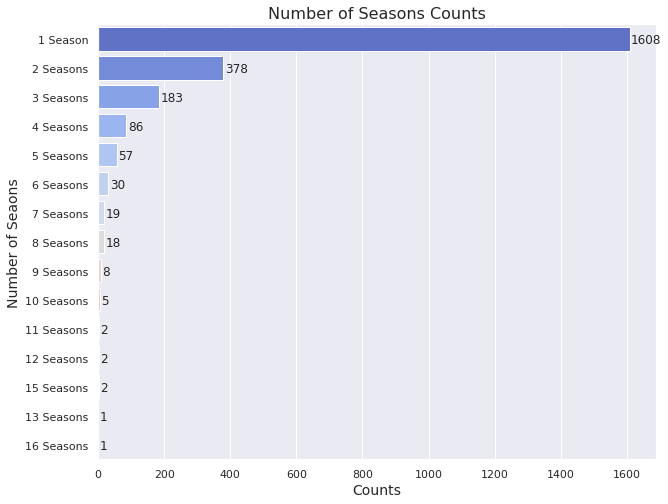

In [47]:
plt.figure(figsize=(10,8))
ax=sns.countplot(y='duration',data=df_tv,order=df_tv['duration'].
                 value_counts().index,palette="coolwarm")
# Adding Annotation
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center',fontsize=12)
plt.title('Number of Seasons Counts' ,fontsize=16)
plt.xlabel('Counts',fontsize=14)
plt.ylabel('Number of Seaons',fontsize=14)

### **Observation:** 

* According to the above counterplot, each of the 1608 television shows had only one season.

* There were extremely few television shows that had more than six seasons.

## **Analysis of Movie Genres**

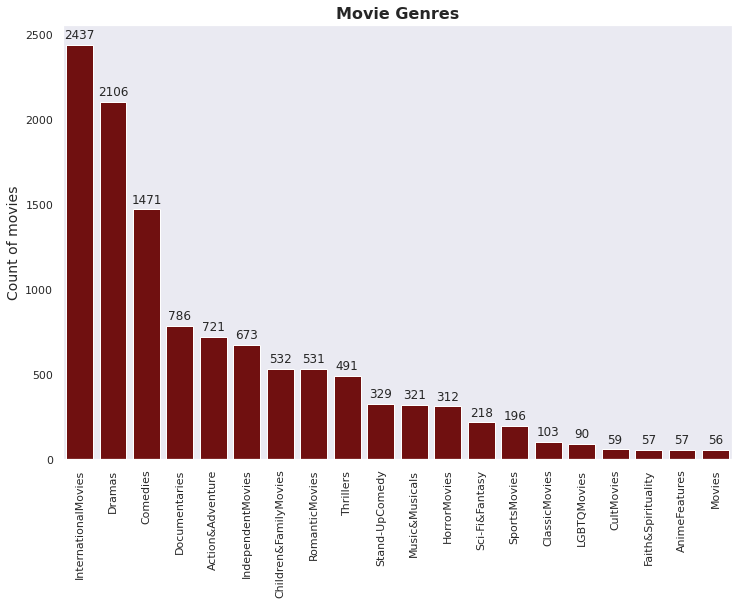

In [48]:
# Importing the Counter
from collections import Counter

# Counting the genres for the movies
genres=list(df_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)


g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(g.keys())
y=list(g.values())
ax=sns.barplot(x,y, color='maroon')

# set a title
plt.title("Movie Genres", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of movies",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

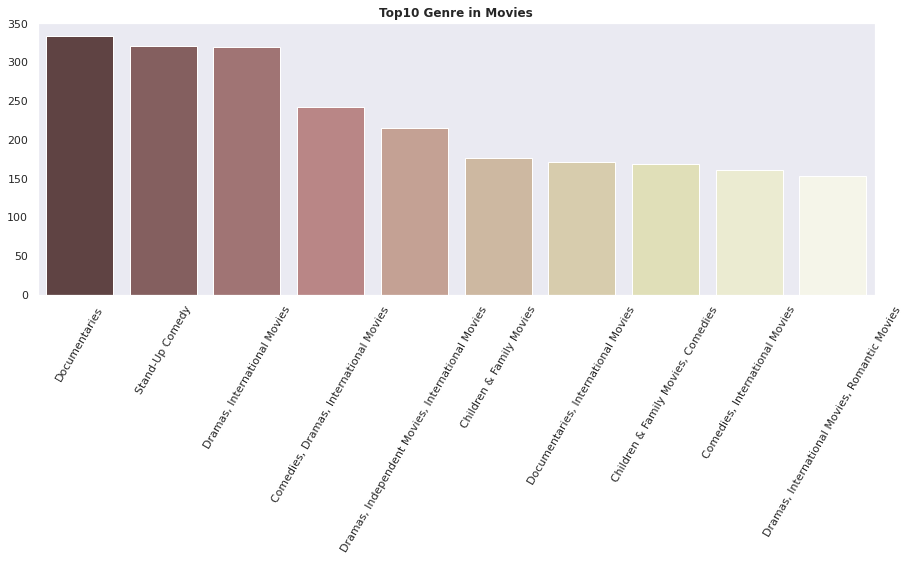

In [49]:
# Top 10 genres without using the Counter 
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

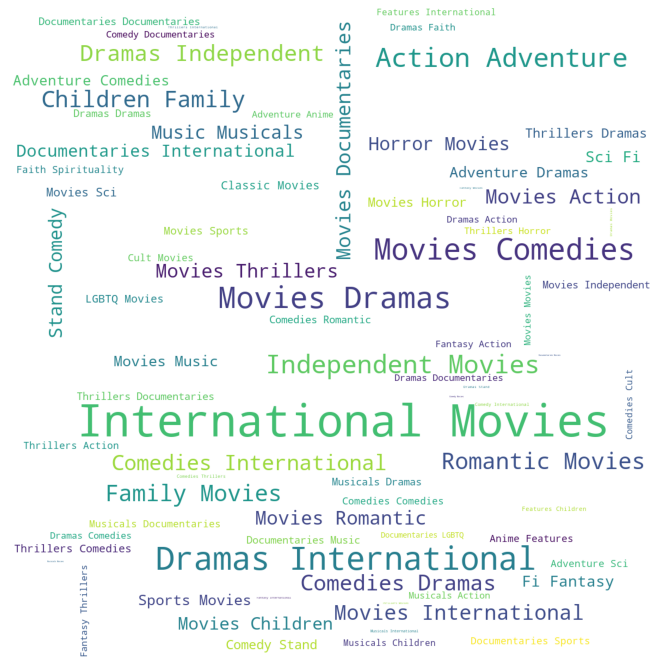

In [50]:
#Wordcloud for the same
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### **Observations:**

* As a result, it is evident that international movies, dramas, and comedies are the top three genres with the most content on Netflix.

## **Analysis of Tv Show Genres**

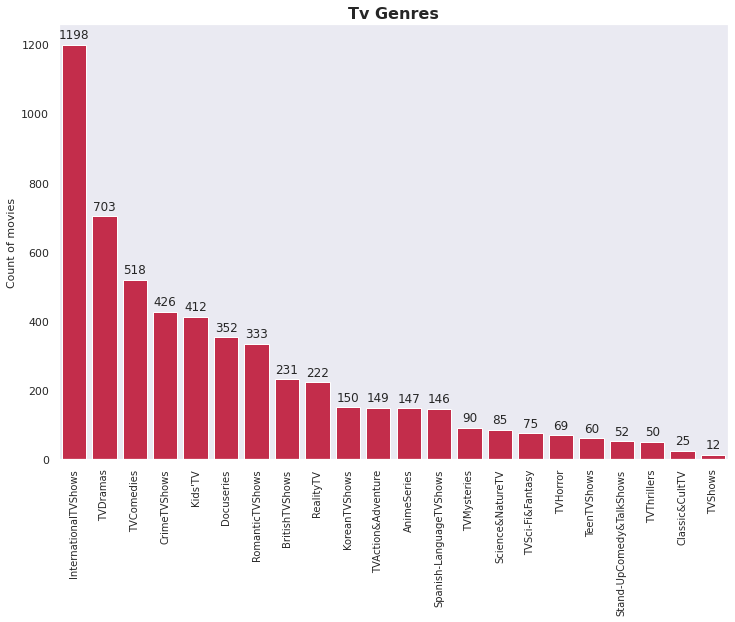

In [51]:
# Countng the genres for tv shows
genres=list(df_tv['listed_in'])
gen=[]
for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graph
plt.figure(figsize = (12, 8))
x=list(g.keys())
y=list(g.values())
ax=sns.barplot(x,y,color='crimson')

# set a title
plt.title("Tv Genres", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90, fontsize=10)
plt.ylabel("Count of movies", fontsize=11)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

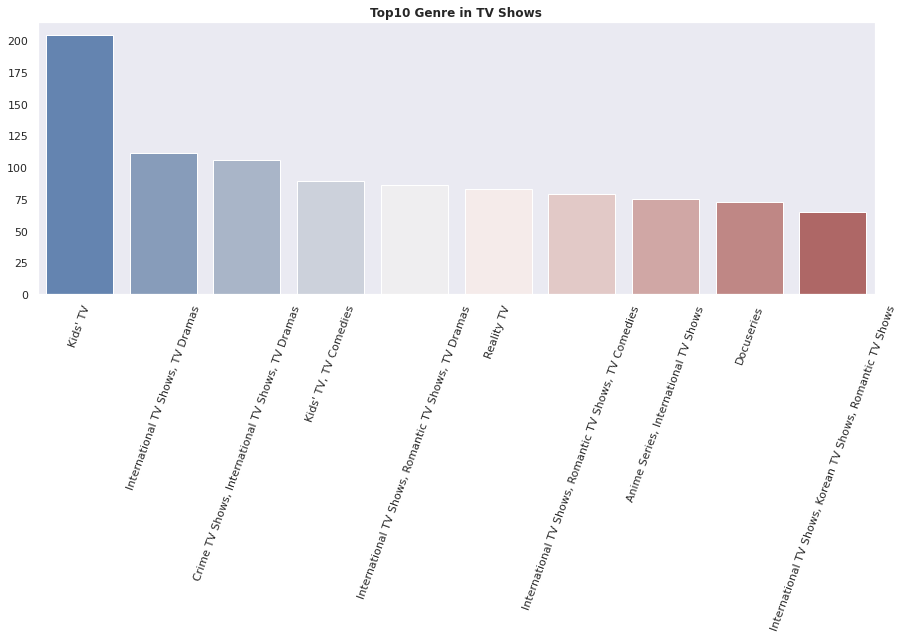

In [52]:
# Top 10 genres without using the Counter
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

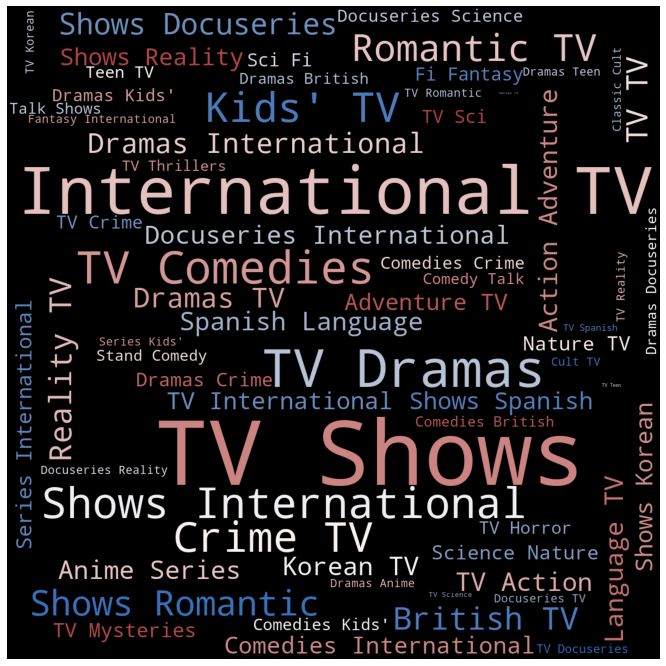

In [53]:
#PLotting on wordcloud
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Observations:**

* As a result, it is evident that international tv shows, tv dramas, and tv comedies are the top three genres with the most content on Netflix.

# **Genres Analysis**

In [54]:
# Importing MultiLabelBinarizer 
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors





# Define the fucntion to create the heatmap for the genres
def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    # Creating the Heatmap
    pl = sns.heatmap(corr, mask=mask, cmap="YlGnBu",vmax=.3, vmin=-.3, square=True, center=0, linewidths=2.5)
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


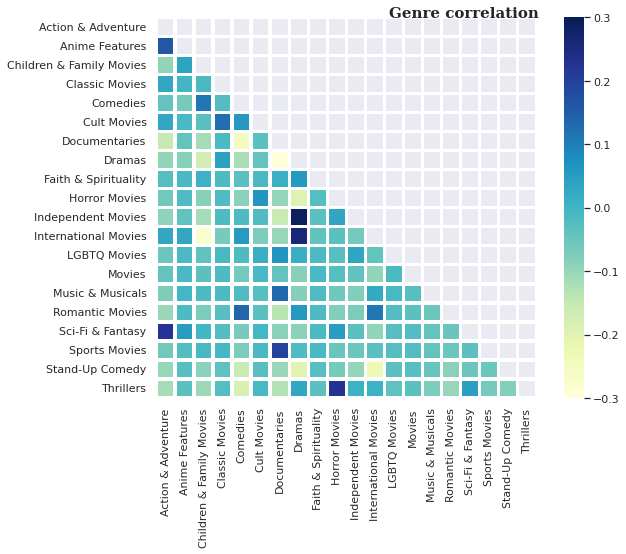

In [55]:
# Using the above function creating the genres heatmap for the movies
genre_heatmap(df_movies, 'Movie')

plt.show()

**Observations:**

* It is interesting that International Movies tend to be Dramas. 
             
* Another observation is that International Movies are rarely in the Children's genres.

# **Netflix Content for different age groups in top 10 countries**

In [56]:
# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']


df_heatmap = netflix_df.loc[netflix_df['principal_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['principal_country'],df_heatmap['age_rating'],normalize = "index").T
df_heatmap

principal_country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.495327,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.463790
Kids,0.130841,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.088974
Older Kids,0.214953,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.201892
Teens,0.028037,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.084540
Young Adults,0.130841,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.160804


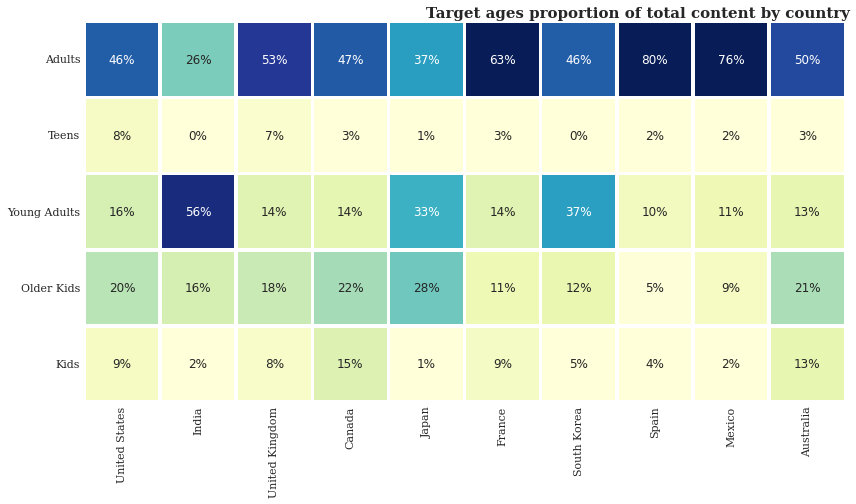

In [57]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico', 'Australia']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

### **Observations:**

* It is also interesting to see parallels between culturally comparable nations - the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

* Also, Mexico and Spain have similar content on Netflix for different age groups.

# **Top 10 directors who create the most content**

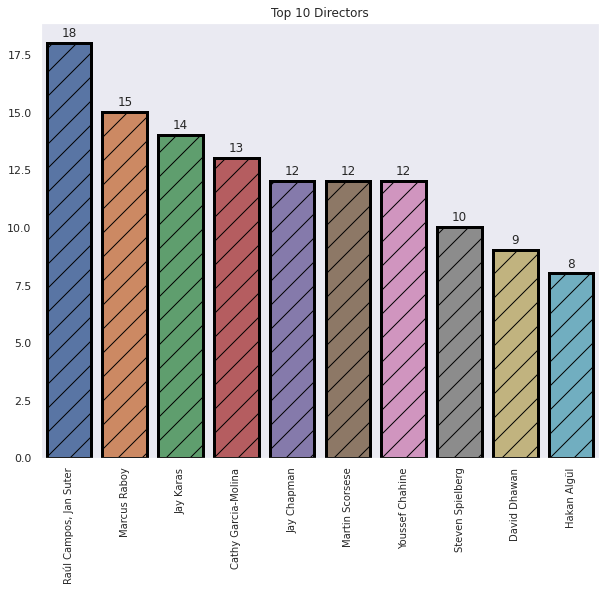

In [58]:
# Top 10 most Productive Movie Directors
plt.figure(figsize=(10,8))
x=df_movies['director'].value_counts().index[1:11]
y=df_movies['director'].value_counts().values[1:11]
ax=sns.barplot(x,y,lw=3, ec='black' , hatch='/')
plt.title('Top 10 Directors')
plt.xticks(rotation = 90, fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

### **Obsevations:**

* The Directors who produce the most material are Raul Campos and Jan Sutler. They work in 18 movies as a director.
* David Dhawan is ranked second among top directors, having directed 15 films.

# **Top 10 Actors who appear in the majority of films**

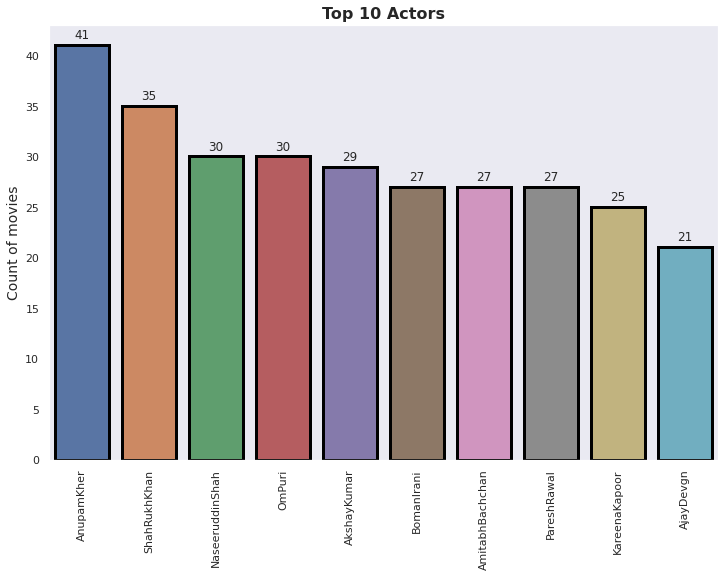

In [59]:
# Importing the Counter
from collections import Counter

# Counting the Actors for the movies
actors=list(df_movies['cast'])
cast=[]

for i in actors:
    i=list(i.split(','))
    for j in i:
        cast.append(j.replace(' ',""))
movie_cast=Counter(cast)


movie_cast={k: v for k, v in sorted(movie_cast.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(movie_cast.keys())
y=list(movie_cast.values())
ax=sns.barplot(x[1:11],y[1:11],lw=3,ec='black')

# set a title
plt.title("Top 10 Actors", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of movies",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

### **Observations**: 

* According to the above barplot, Anupam Kher has worked in over 40 films.

* After Anupam Kher, Shahrukh Khan is ranked second, with 35 films under his belt.

* Naseeruddin Shah and Ompuri have worked in 30 films.


# **Top 10 Actors who appear in the majority of Tv shows**

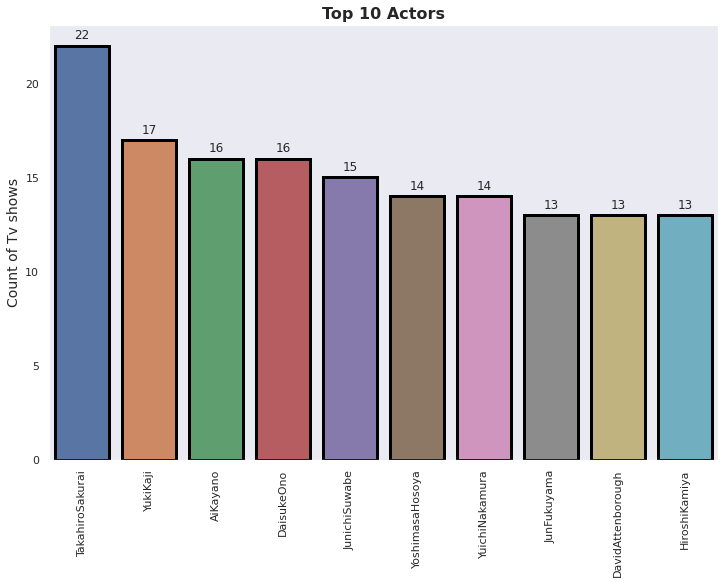

In [60]:
# Importing the Counter
from collections import Counter

# Counting the Actors for the movies
actors=list(df_tv['cast'])
cast=[]

for i in actors:
    i=list(i.split(','))
    for j in i:
        cast.append(j.replace(' ',""))
tv_cast=Counter(cast)


tv_cast={k: v for k, v in sorted(tv_cast.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(tv_cast.keys())
y=list(tv_cast.values())
ax=sns.barplot(x[1:11],y[1:11],lw=3,ec='black')

# set a title
plt.title("Top 10 Actors", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of Tv shows",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

### **Observations**: 

* According to the above barplot, Takahiro Sakurai has worked in over 20 tv shows.

* After Takahiro Sakurai, Yuki Kaji is ranked second, with 17 tv shows under his belt.

* Aikayano and Daisuke Ono have worked in 16 tv shows.

#**Data Preparation**

**The data preprocessing steps change slightly from those employed in the preceding process. Because we are clustering on the dataset's text-based properties, we don't need to remove the NaN observations from the date added columns.**

 ## **Identifying and handling the missing values**


In [61]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [62]:
# Fill missing country entries with United States o
df1['country'].fillna('United States',inplace=True)

# Filling missing values in the rest of columns with other
df1.fillna('Other', inplace=True)




## **Encoding the categorical data**

**First, we transform column data to a list so that we can do suitable actions in columns. Then we find the unique cast, directors, and genres for these columns.** 

In [63]:
# Change director, cast, country, and listed_in columns from type str to lists
df1.director = df1.director.str.split(', ').tolist()
df1.cast = df1.cast.str.split(', ').tolist()
df1.country = df1.country.str.split(', ').tolist()
df1.listed_in = df1.listed_in.str.split(', ').tolist()

In [64]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,[Other],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


In [65]:
# Array of all unique directors, cast members, countries, ratings, and genres
all_directors = df1['director'].explode().unique()
all_cast = df1['cast'].explode().unique()
all_countries = df1['country'].explode().unique()
all_ratings = df1['rating'].unique()
all_genres = df1['listed_in'].explode().unique()

len(all_directors), len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(4479, 32882, 121, 15, 42)

**Here, we can see that the director column has 4479 unique directors and the cast column has 32882 unique actors. Similarly, the country column has 121 unique columns.**

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   date_added    7787 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7787 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [67]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,[Other],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Connell...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


In [68]:
# Retain primary director, lead actor/actress, and primary country
for i in range(len(df1)):
  df1['director'][i] = df1['director'][i][0]
  df1['cast'][i] = df1['cast'][i][0]
  df1['country'][i] = df1['country'][i][0]
  i += 1

In [69]:
# Renaming the dataframe 
feature_reduced_df = df1.copy()
feature_reduced_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Other,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


**In this section, we transform the listed in and rating columns to binary values. When we convert the director, cast, and nation columns to binary values, the number of columns increases. The k-means algorithm performs badly due to its large dimensionality. Multilabelbinarizer allows you to encode multiple labels per instance.**

In [70]:
# Importing the MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = feature_reduced_df.join(pd.DataFrame(mlb.fit_transform(feature_reduced_df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=feature_reduced_df.index))

In [71]:
# Importing the one hot encoder
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to rating column
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_rating = pd.DataFrame(encoder.fit_transform(mlb_df[['rating']]), columns=all_ratings)

# One-hot encoding removed index; put it back
encoded_rating.index = mlb_df.index

# Add one-hot encoded columns to data frame
mlb_df = mlb_df.join(encoded_rating)

In [72]:
# Installing the category encoder
!pip install category_encoders

     |████████████████████████████████| 86 kB 3.3 MB/s 


In [73]:
# Importing the category encoders
import category_encoders as ce

# Create the count encoder
count_enc = ce.CountEncoder()

# Count encode director, cast, and country columns
count_encoded = count_enc.fit_transform(mlb_df[['director','cast','country']])

# Rename the columns with the _count suffix, and join to dataframe
netflix_encoded_df = mlb_df.join(count_encoded.add_suffix("_count"))

In [74]:
# Droping the Columns befor applying clustering
netflix_encoded_df = netflix_encoded_df.drop(['type','title','director','cast',
                                              'country','rating','description',
                                              'date_added','show_id',
                                              'release_year','duration']
                                             , axis=1)
netflix_encoded_df.shape
netflix_encoded_df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,Other,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR,director_count,cast_count,country_count
0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2389,1,79
1,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2,123
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,28
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,3389
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,3389


### **Finding optimal value of k**

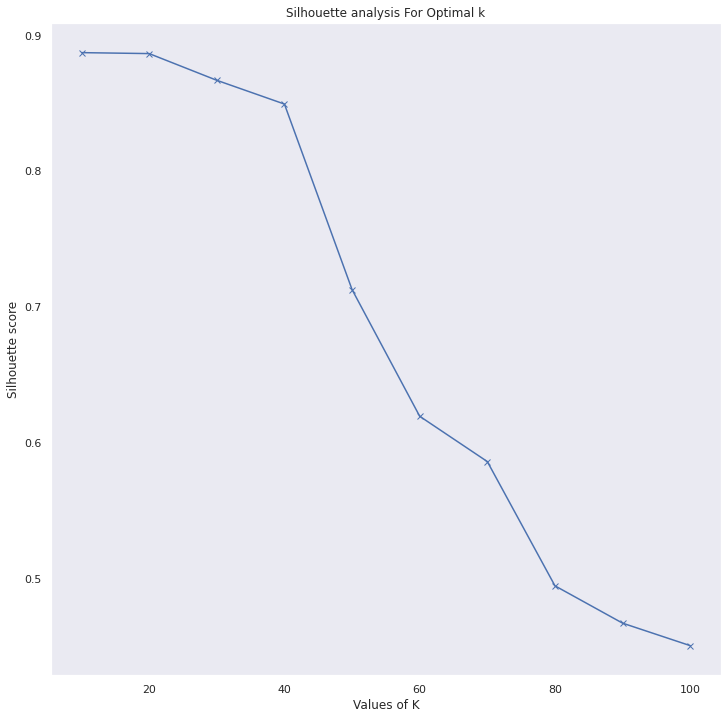

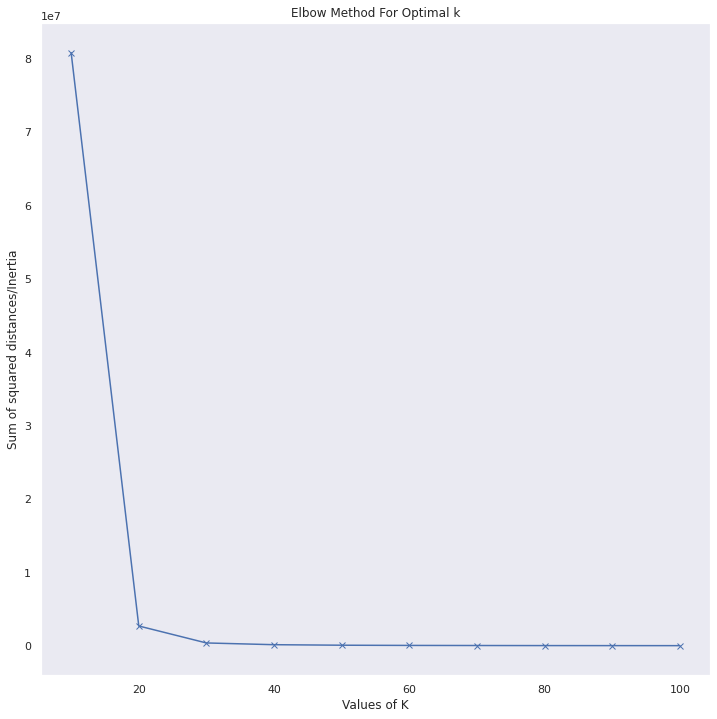

In [75]:
# Silhouette scores for different values of k And Elbow method
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters =[10,20,30,40,50,60,70,80,90,100]
silhouette_avg = []
Sum_of_squared_distances = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
 kmeans.fit(netflix_encoded_df)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(netflix_encoded_df, cluster_labels))
 Sum_of_squared_distances.append(kmeans.inertia_)
 
 # silhouette score

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Elbow method

plt.plot(range_n_clusters,Sum_of_squared_distances,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

**The optimal value of k is 20.**

# **Applying the Model**

In [76]:
# Applying the model
from sklearn.cluster import KMeans

# Create K-Means Model
modelkmeans = KMeans(n_clusters=20, init='k-means++', n_init=10).fit(netflix_encoded_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

# Attach cluster predictions to original data frame
df2.insert(len(df2.columns), column = 'cluster', value = predictions_df.cluster)

In [77]:
# Checking the predictions
df2.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,12
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",16
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",0
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,1
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",5
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,5


## **Plotting the Clusters**

Here, we use the t-SNE method to reduce the dimension. So, we can plot the clusters in two-dimensional space.

In [78]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(netflix_encoded_df)

x_embedded.shape

(7787, 2)

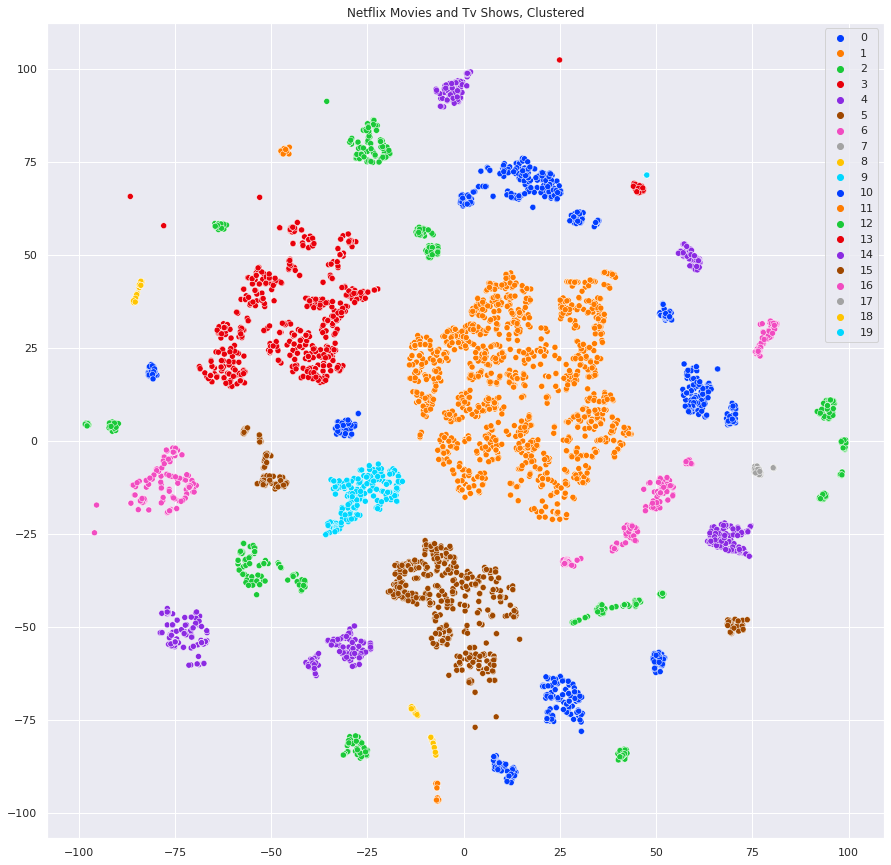

In [79]:
# Plotting the Clusters
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(predictions)))

# plot
sns.scatterplot(x_embedded[:,0], x_embedded[:,1], hue=predictions, legend='full', palette=palette)
plt.title("Netflix Movies and Tv Shows, Clustered")

plt.show()

# **Movie and Tv show Recommendation using the K-Means Clustring**

We consider the value of K to be 600 when making movie and television show suggestions. If we set k to 20, it will recommend more than 1000 movies and TV shows for some movies and TV shows, which is a terrible recommendation algorithm.

In [80]:
netflix_encoded_df.shape

(7787, 60)

In [81]:
# Applying the model
from sklearn.cluster import KMeans

# Create K-Means Model
modelkmeans = KMeans(n_clusters=600, init='k-means++', n_init=10).fit(netflix_encoded_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])


df2.drop('cluster',axis=1,inplace=True)
# Attach cluster predictions to original data frame
df2.insert(len(df2.columns), column = 'cluster', value = predictions_df.cluster)

In [82]:
# Get cluster number for movie 
cluster_num = df2[df2.title=='1920'].cluster.item()

# View cluster the movie or TV show belongs to
df2[df2.cluster == cluster_num]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,353
129,s130,Movie,6-5=2,Bharat Jain,"Prashantt Guptha, Gaurav Paswala, Gaurav Kotha...",India,"November 1, 2017",2014,TV-MA,103 min,"Horror Movies, International Movies, Thrillers",Six friends decide to undertake a grueling mou...,353
1132,s1133,Movie,Bulbbul,Anvita Dutt,"Tripti Dimri, Avinash Tiwary, Rahul Bose, Para...",India,"June 24, 2020",2020,TV-MA,94 min,"Horror Movies, International Movies",A child bride grows up to be an enigmatic woma...,353
1621,s1622,Movie,Darna Mana Hai,Prawal Raman,"Aftab Shivdasani, Antara Mali, Boman Irani, Is...",India,"August 1, 2019",2003,TV-MA,116 min,"Horror Movies, International Movies, Thrillers",Stranded in a jungle when their car breaks dow...,353
2748,s2749,Movie,Hisss,Jennifer Lynch,"Mallika Sherawat, Irrfan Khan, Jeff Doucette, ...","India, United States","December 1, 2017",2010,TV-MA,97 min,"Horror Movies, International Movies, Thrillers",In a plot to bait the snake-goddess Nagin for ...,353
3455,s3456,Movie,Krishna Cottage,Santram Varma,"Sohail Khan, Isha Koppikar, Natasha, Rati Agni...",India,"May 31, 2019",2004,TV-MA,124 min,"Action & Adventure, Horror Movies, Internation...",True love is put to the test when another woma...,353
3565,s3566,Movie,Lechmi,B.N. Shajeer Sha,"Parvathy Ratheesh, Biju Sopanam, Sethulekshmi ...",India,"August 1, 2018",2017,TV-MA,147 min,"Comedies, Horror Movies, International Movies",The spirit of a murdered woman contacts four b...,353
3834,s3835,Movie,Macchli Jal Ki Rani Hai,Debaloy Dey,"Swara Bhaskar, Bhanu Uday, Murli Sharma, Deep ...",India,"October 15, 2017",2014,TV-MA,118 min,"Horror Movies, International Movies",After relocating to a different town with her ...,353
4993,s4994,Movie,Psycho,Mysskin,"Udhayanidhi Stalin, Aditi Rao Hydari, Nithya M...",India,"May 1, 2020",2020,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",As a visually impaired man attempts to rescue ...,353
5009,s5010,Movie,Puriyatha Puthir,Ranjit Jeyakodi,"Vijay Sethupathi, Gayathrie, Mahima Nambiar, A...",India,"January 1, 2019",2017,TV-MA,120 min,"International Movies, Thrillers",An aspiring music director begins to receive v...,353


In [83]:

# Get cluster number for TV show
cluster_num = df2[df2.title=='Breaking Bad'].cluster.item()

# View cluster the TV show belongs to
df2[df2.cluster == cluster_num]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
1089,s1090,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,501
1608,s1609,TV Show,Dare Me,NaN,"Willa Fitzgerald, Herizen Guardiola, Marlo Kel...",United States,"December 30, 2020",2019,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Thrillers",Relationships topple and loyalties flip when a...,501
1711,s1712,TV Show,Designated Survivor,NaN,"Kiefer Sutherland, Natascha McElhone, Maggie Q...",United States,"June 7, 2019",2019,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",America's fate rests in the hands of a low-lev...,501
2832,s2833,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...,501
3970,s3971,TV Show,Marvel's The Punisher,NaN,"Jon Bernthal, Ebon Moss-Bachrach, Ben Barnes, ...",United States,"January 18, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, TV Action & Adventure, TV Thri...",A former Marine out to punish the criminals re...,501
4716,s4717,TV Show,Ozark,NaN,"Jason Bateman, Sofia Hublitz, Laura Linney, Sk...",United States,"March 27, 2020",2020,TV-MA,3 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A financial adviser drags his family from Chic...,501
6096,s6097,TV Show,The Assassination of Gianni Versace,NaN,"Edgar Ramírez, Darren Criss, Ricky Martin, Pen...",United States,"March 6, 2019",2018,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Thrillers","Defining moments in Andrew Cunanan's life, sta...",501
7544,s7545,TV Show,WHAT / IF,NaN,"Renée Zellweger, Jane Levy, Blake Jenner, Keit...",United States,"May 24, 2019",2019,TV-MA,1 Season,"TV Dramas, TV Thrillers",Desperate to secure funding for her med tech s...,501


#**Conclusion:**

* First, we run Data Wrangling on our model to ensure that there are no duplicate entries in our dataset. After checking the duplicates in our dataset we perform analysis for null values in our dataset. Here, we found more than 30% null values in the director's column. Then, we take appropriate action for null values according to the circumstances. We remove null values of the added_date columns because there is no logical way to deal with the null values of the date column.

* In the second step, we perform EDA and Data Visualization on our dataset. Here, we found that the proportion of tv shows in Netflix content is very less as compared to the movies. We can observe that the majority of Netflix material is intended for adults. There is very little content available for teens and kids. The number of movies on Netflix is growing significantly faster than the number of TV shows. Because of covid-19, there is a significant drop in the number of movies and television episodes produced after 2019. Because of covid-19, there is a significant drop in the number of movies and television episodes produced after 2019.

* The United States is the most prolific generator of Netflix content, with India and the United Kingdom trailing far behind. The majority of the content on Netflix in India is comprised of movies. The fundamental reason for the variation in content must be due to market research undertaken by Netflix. It is also interesting to see parallels between culturally comparable nations - the US and UK are closely aligned with their Netflix target ages, but radically different from, for example, India or Japan!

*  It is evident that international movies/ tv shows, tv dramas, and tv comedies are the top three genres with the most content on Netflix. It is interesting that International Movies tend to be Dramas.

* Here, we perform the K-Means clustering on our dataset. Here, we find the optimal value of k is 20. But, if we want to recommend some movies and tv shows then k=20 is not good so in such a case, we take the value of k as 600.
The silhouette score for k=20 is 0.886575253337518 which is a very good score.
